=== Data Makanan (19 Kolom) ===


,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000.0
1,nasipadang,1.0,0.8,0.9,0.5,17000.0
2,mieayam,1.0,0.6,0.9,0.3,10000.0
3,bakso,0.7,0.3,1.0,0.3,10000.0
4,cireng,0.5,0.4,0.8,0.7,10000.0
5,nasigoreng,0.8,0.7,1.0,0.5,14000.0
6,seblak,0.6,0.2,0.8,0.8,15000.0
7,gorengan,0.5,0.2,0.5,0.5,10000.0
8,capcay,0.6,0.9,0.8,0.4,15000.0
9,mi instan,0.5,0.1,0.7,0.2,5000.0


Strategi optimum = 455
Skor kumulatif = 90.38
Sisa uang = 301,000
RESP sehat = 5.30
Jadwal makan (pagi & malam selama 31 hari):
Hari 1: pagi=warteg, malam=soto
Hari 2: pagi=bakso, malam=seblak
Hari 3: pagi=nasi telur, malam=ayamgeprek
Hari 4: pagi=ayamgeprek, malam=martabak
Hari 5: pagi=martabak, malam=bakso
Hari 6: pagi=nasigoreng, malam=nasipecel
Hari 7: pagi=gorengan, malam=mi instan 
Hari 8: pagi=nasipadang, malam=nasipecel
Hari 9: pagi=warteg, malam=ayamgeprek
Hari 10: pagi=martabak, malam=nasipadang
Hari 11: pagi=nasipadang, malam=ayamgeprek
Hari 12: pagi=mi instan , malam=seblak
Hari 13: pagi=warteg, malam=gorengan
Hari 14: pagi=bubur, malam=mieayam
Hari 15: pagi=nasi telur, malam=martabak
Hari 16: pagi=nasipadang, malam=warteg
Hari 17: pagi=warteg, malam=nasirawon
Hari 18: pagi=penyetan, malam=soto
Hari 19: pagi=nasirawon, malam=ayamgeprek
Hari 20: pagi=mi instan , malam=seblak
Hari 21: pagi=ayamgeprek, malam=warteg
Hari 22: pagi=gorengan, malam=ayamgeprek
Hari 23: pagi=capcay,

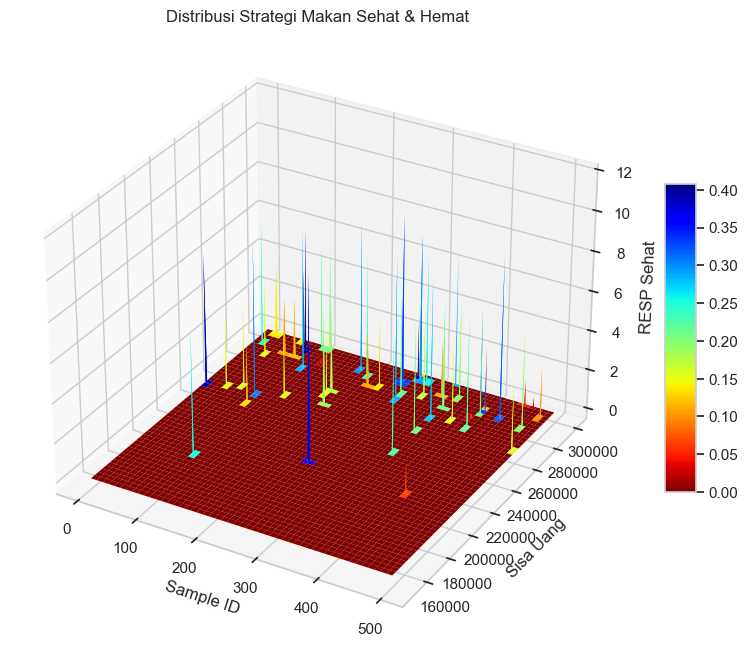

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Baca CSV ---
makan = pd.read_csv("makanan.csv")

# --- Tampilkan isi tabel (14 kolom) ---
print("=== Data Makanan (19 Kolom) ===")
display(makan)   #

# --- Simulasi ---
NPM = 19102
np.random.seed(NPM)

budget= 1.2e6  #rupiah

wkenyang_base= 0.9
wrasa_base= 0.7
wsehat_base= 0.8 
wbosan_base= 0.5

SAMPLE_NUM = 500
sampleid = np.arange(0, SAMPLE_NUM)

skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)

for n in range(SAMPLE_NUM):
    budget = 1.2e6
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(31):  # hari
        # makan pertama
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]

        # makan kedua
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]

    # simpan hasil
    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    # hitung index dengan aman
    idx = (budget - SISA_MININUM) / 1000
    if not np.isnan(idx) and 0 <= idx < len(bin_sisa):
        resp_sehat[n][int(idx)] = skor_sehat

# (1) strategi dengan resp_sehat positif
positif_mask = sehat > 0
strategi_positif = np.where(positif_mask)[0]

# (2) strategi dengan sisa uang positif
mask_uang = (sisa > 0) & positif_mask
strategi_uang_positif = np.where(mask_uang)[0]

# (3) strategi skor kumulatif terbesar dengan resp_sehat positif
if len(strategi_positif) > 0:
    idx_optimum = strategi_positif[np.argmax(skor[strategi_positif])]
else:
    idx_optimum = None

# ============================================================
# (4) tampilkan jadwal makanan strategi optimum
if idx_optimum is not None:
    print(f"Strategi optimum = {idx_optimum}")
    print(f"Skor kumulatif = {skor[idx_optimum]:.2f}")
    print(f"Sisa uang = {sisa[idx_optimum]:,.0f}")
    print(f"RESP sehat = {sehat[idx_optimum]:.2f}")
    print("Jadwal makan (pagi & malam selama 31 hari):")
    for hari in range(31):
        pagi = makan['makanan'][resp_pilih[idx_optimum][2*hari]]
        malam = makan['makanan'][resp_pilih[idx_optimum][2*hari+1]]
        print(f"Hari {hari+1}: pagi={pagi}, malam={malam}")

# --- Plot 3D ---
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)

surf = ax.plot_surface(X, Y, resp_sehat, cmap='jet_r', edgecolor='none')


ax.set_xlabel("Sample ID")
ax.set_ylabel("Sisa Uang")
ax.set_zlabel("RESP Sehat")
ax.set_title("Distribusi Strategi Makan Sehat & Hemat")

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

Output yang kamu tunjukkan itu hasil dari pencarian strategi optimum berdasarkan data simulasi/perhitungan. 

Strategi optimum = 455

Angka 455 biasanya merepresentasikan ID strategi / skenario ke-455 dari sekian banyak percobaan/alternatif yang dievaluasi.

Artinya, di antara ratusan kombinasi strategi yang dicoba, strategi nomor 455 inilah yang paling baik menurut kriteria optimasi (misalnya skor sehat tertinggi dengan budget terbatas).

Skor kumulatif = 90.38

Ini adalah nilai total kesehatan yang didapat dari strategi tersebut.

Bisa jadi skor ini dihitung dari akumulasi gizi, keseimbangan menu, atau indikator kesehatan lain.

Angka 90.38 menunjukkan bahwa strategi ini punya performa sangat baik dibandingkan strategi lain.

Sisa uang = 301,000

Setelah menerapkan strategi optimum, dari budget awal (misalnya Rp 1.500.000) masih ada Rp 301 ribu tersisa.

Ini berarti strategi optimum tidak hanya sehat, tapi juga efisien secara biaya.

RESP sehat = 5.30

Nilai RESP sehat bisa ditafsirkan sebagai rasio efektivitas strategi terhadap kesehatan per unit biaya.

Dengan skor 5.30, artinya strategi ini punya tingkat efektivitas cukup tinggi: setiap rupiah yang dikeluarkan berkontribusi besar terhadap skor sehat.

Dari seluruh strategi yang dicoba, strategi ke-455 adalah yang paling optimal. Strategi ini menghasilkan skor kumulatif kesehatan 90.38 dengan sisa budget Rp301.000. Artinya, bukan hanya sehat, tapi juga hemat. Nilai RESP sehat 5.30 menunjukkan strategi ini memiliki rasio efektivitas kesehatan terhadap biaya yang tinggi.